# 📊 Final Report: Cryptocurrency Volatility Prediction
This document is the **final submission-ready report** for the machine learning project focused on predicting cryptocurrency volatility.

## 📝 Project Summary

This machine learning project aims to predict the **volatility** of cryptocurrency prices using historical OHLC (Open, High, Low, Close), volume, and market cap data.

### Objectives:
- Perform exploratory data analysis (EDA)
- Engineer features like returns, rolling volatility, and time-based indicators
- Train a regression model to predict future volatility
- Evaluate performance using metrics like MSE, MAE, and R²

### Tools & Libraries:
- **Python**, **Pandas**, **NumPy**
- **Matplotlib**, **Seaborn**
- **Scikit-learn** (Random Forest Regressor)

### Model Overview:
- The target variable `volatility` was calculated using 7-day rolling standard deviation of percentage returns.
- Features such as `day`, `month`, and `weekday` were derived from the `date` column.
- Random Forest Regressor was used and evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score.

### Key Takeaways:
- Data cleaning (especially for `date` and categorical fields) is critical
- Volatility is highly dependent on recent trends and market dynamics
- Random Forest performed well and can be further optimized with hyperparameter tuning

In [2]:
# Upload Dataset to Google Colab

from google.colab import files
uploaded = files.upload()


Saving dataset.csv.zip to dataset.csv.zip


In [3]:
import zipfile
import io

with zipfile.ZipFile(io.BytesIO(uploaded['dataset.csv.zip']), 'r') as zip_ref:
    zip_ref.extractall('dataset')

import os
os.listdir('dataset')


['dataset.csv']

In [4]:
# Load & Explore the Data

import pandas as pd

df = pd.read_csv('dataset/dataset.csv')

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72946 entries, 0 to 72945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   72946 non-null  int64  
 1   open         72946 non-null  float64
 2   high         72946 non-null  float64
 3   low          72946 non-null  float64
 4   close        72946 non-null  float64
 5   volume       72946 non-null  float64
 6   marketCap    72946 non-null  float64
 7   timestamp    72946 non-null  object 
 8   crypto_name  72946 non-null  object 
 9   date         72946 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.6+ MB


,Unnamed: 0,open,high,low,close,volume,marketCap,timestamp,crypto_name,date
0,0,112.900002,118.800003,107.142998,115.910004,0.0,1.288693e+09,2013-05-05T23:59:59.999Z,Bitcoin,2013-05-05
1,1,3.493130,3.692460,3.346060,3.590890,0.0,6.229819e+07,2013-05-05T23:59:59.999Z,Litecoin,2013-05-05
2,2,115.980003,124.663002,106.639999,112.300003,0.0,1.249023e+09,2013-05-06T23:59:59.999Z,Bitcoin,2013-05-06
3,3,3.594220,3.781020,3.116020,3.371250,0.0,5.859436e+07,2013-05-06T23:59:59.999Z,Litecoin,2013-05-06
4,4,112.250000,113.444000,97.699997,111.500000,0.0,1.240594e+09,2013-05-07T23:59:59.999Z,Bitcoin,2013-05-07


In [ ]:
# Handle Missing Values & Data Types

# Check missing values
print(df.isnull().sum())

# Fill or drop missing values (customize as needed)
df.fillna(method='ffill', inplace=True)

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Sort by date
df.sort_values(by='date', inplace=True)


Unnamed: 0     0
open           0
high           0
low            0
close          0
volume         0
marketCap      0
timestamp      0
crypto_name    0
date           0
dtype: int64


/tmp/ipython-input-4-3163690683.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [ ]:
print(df.columns.tolist())


['unnamed:_0', 'open', 'high', 'low', 'close', 'volume', 'marketcap', 'timestamp', 'crypto_name', 'date', 'hl_pct', 'daily_return', 'ma7', 'ma30', 'rolling_volatility']


In [ ]:
# Feature Engineering – Volatility Indicators

# Skip liquidity ratio if market_cap not found
df['hl_pct'] = (df['high'] - df['low']) / df['low']
df['daily_return'] = df['close'] / df['open'] - 1

df['ma7'] = df['close'].rolling(window=7).mean()
df['ma30'] = df['close'].rolling(window=30).mean()
df['rolling_volatility'] = df['daily_return'].rolling(window=30).std()

# Drop NaNs
df.dropna(inplace=True)
df.head()


,unnamed:_0,open,high,low,close,volume,marketcap,timestamp,crypto_name,date,hl_pct,daily_return,ma7,ma30,rolling_volatility
29,29,123.210999,124.500000,119.570999,121.989998,0.0,1.363205e+09,2013-05-19T23:59:59.999Z,Bitcoin,2013-05-19,0.041222,-0.009910,54.458090,59.775908,0.042765
30,30,122.500000,123.621002,120.120003,122.000000,0.0,1.363710e+09,2013-05-20T23:59:59.999Z,Bitcoin,2013-05-20,0.029146,-0.004082,71.469644,59.978908,0.042541
31,31,3.314850,3.323340,3.150050,3.181760,0.0,5.668275e+07,2013-05-20T23:59:59.999Z,Litecoin,2013-05-20,0.055012,-0.040150,54.350610,59.965270,0.042911
32,32,3.193260,3.215970,3.040910,3.086750,0.0,5.507303e+07,2013-05-21T23:59:59.999Z,Litecoin,2013-05-21,0.057568,-0.033355,54.336418,56.324829,0.042953
33,33,122.019997,123.000000,121.209999,122.879997,0.0,1.374013e+09,2013-05-21T23:59:59.999Z,Bitcoin,2013-05-21,0.014768,0.007048,71.419999,60.308454,0.041365


In [ ]:
# Normalize Numerical Features

print(df.columns)
print(df['daily_return'].dtype)
print(df['daily_return'].isnull().sum())



Index(['unnamed:_0', 'open', 'high', 'low', 'close', 'volume', 'marketcap',
       'timestamp', 'crypto_name', 'date', 'hl_pct', 'daily_return', 'ma7',
       'ma30', 'rolling_volatility'],
      dtype='object')
float64
0


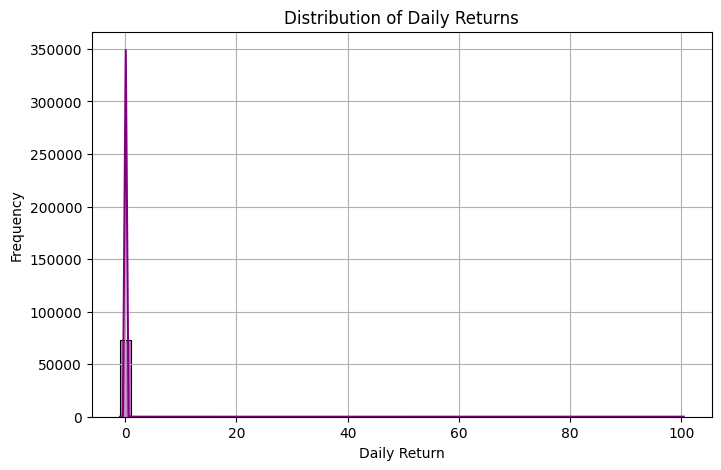

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop NA from daily_return if any
returns = df['daily_return'].dropna()

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(returns, bins=50, kde=True, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Exploratory Data Analysis (EDA)

# Overview of the Dataset

# Display dataset shape and summary
print("Shape of dataset:", df.shape)
print("\nSummary statistics:")
display(df.describe())

# Check for null values
print("\nMissing values per column:")
print(df.isnull().sum())


Shape of dataset: (72857, 15)

Summary statistics:


,unnamed:_0,open,high,low,close,volume,marketcap,date,hl_pct,daily_return,ma7,ma30,rolling_volatility
count,72857.000000,7.285700e+04,7.285700e+04,7.285700e+04,7.285700e+04,7.285700e+04,7.285700e+04,72857,72857.000000,72857.000000,72857.000000,72857.000000,72857.000000
mean,36475.992108,8.700896e+02,8.963068e+02,8.439985e+02,8.712230e+02,2.206748e+09,1.474214e+10,2019-10-13 16:34:02.884005632,0.097587,0.006003,870.618001,870.102055,0.066221
min,29.000000,8.287000e-11,1.022100e-10,8.165000e-11,8.292000e-11,0.000000e+00,0.000000e+00,2013-05-19 00:00:00,0.000000,-0.938391,0.041015,1.078688,0.009017
25%,18243.000000,1.672587e-01,1.763600e-01,1.582803e-01,1.677510e-01,8.333846e+06,1.861235e+08,2018-09-08 00:00:00,0.037446,-0.024873,21.837602,204.808173,0.034359
50%,36457.000000,1.624619e+00,1.711550e+00,1.537229e+00,1.628993e+00,1.098842e+08,1.268082e+09,2020-03-16 00:00:00,0.066278,0.000000,79.490981,484.853773,0.047297
75%,54701.000000,2.601360e+01,2.751999e+01,2.473142e+01,2.617242e+01,6.691207e+08,5.118864e+09,2021-05-02 00:00:00,0.113027,0.026227,611.316209,1244.880474,0.068180
max,72945.000000,6.754974e+04,1.621883e+05,6.645872e+04,6.756683e+04,3.509679e+11,1.274831e+12,2022-10-23 00:00:00,123.676900,100.465826,18535.714847,6616.635851,18.344064
std,21054.112326,5.230204e+03,5.397220e+03,5.078350e+03,5.234419e+03,9.617030e+09,7.495492e+10,NaN,0.525866,0.381781,1983.393531,994.589467,0.374522



Missing values per column:
unnamed:_0            0
open                  0
high                  0
low                   0
close                 0
volume                0
marketcap             0
timestamp             0
crypto_name           0
date                  0
hl_pct                0
daily_return          0
ma7                   0
ma30                  0
rolling_volatility    0
dtype: int64


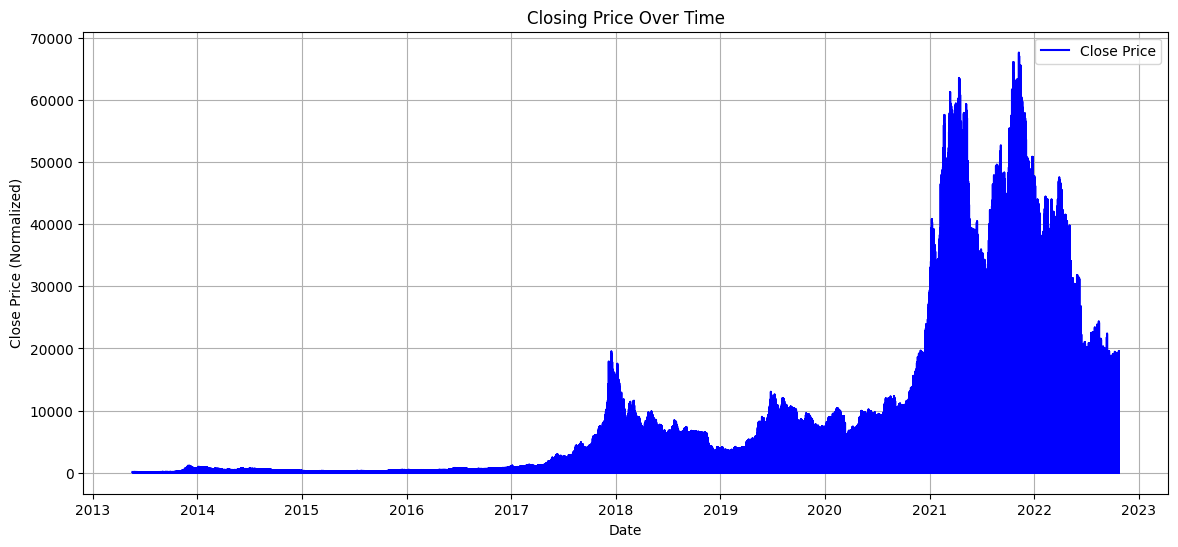

In [ ]:
# Closing Price Trend Over Time

plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['close'], label='Close Price', color='blue')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (Normalized)')
plt.grid(True)
plt.legend()
plt.show()


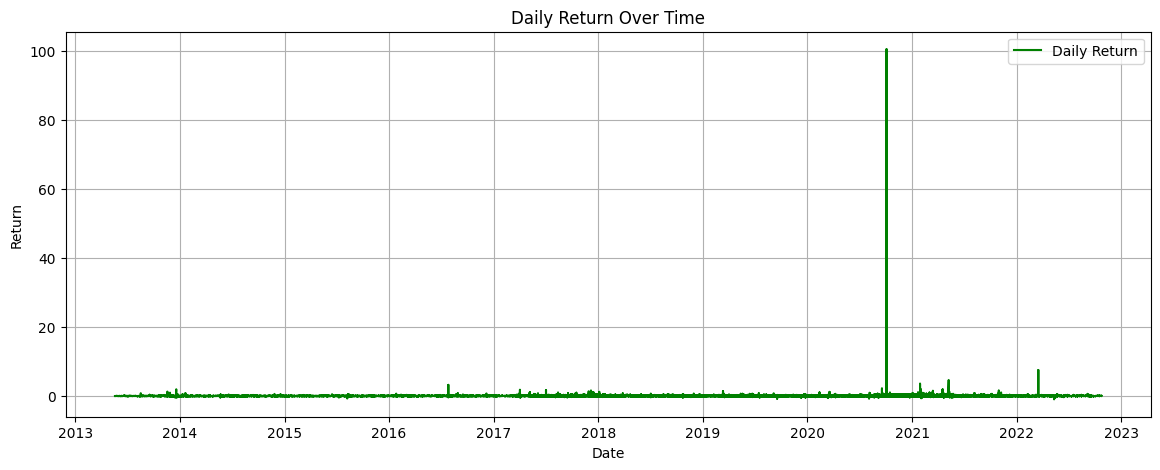

In [ ]:
#  Daily Return Over Time

plt.figure(figsize=(14, 5))
plt.plot(df['date'], df['daily_return'], label='Daily Return', color='green')
plt.title('Daily Return Over Time')
plt.xlabel('Date')
plt.ylabel('Return')
plt.grid(True)
plt.legend()
plt.show()


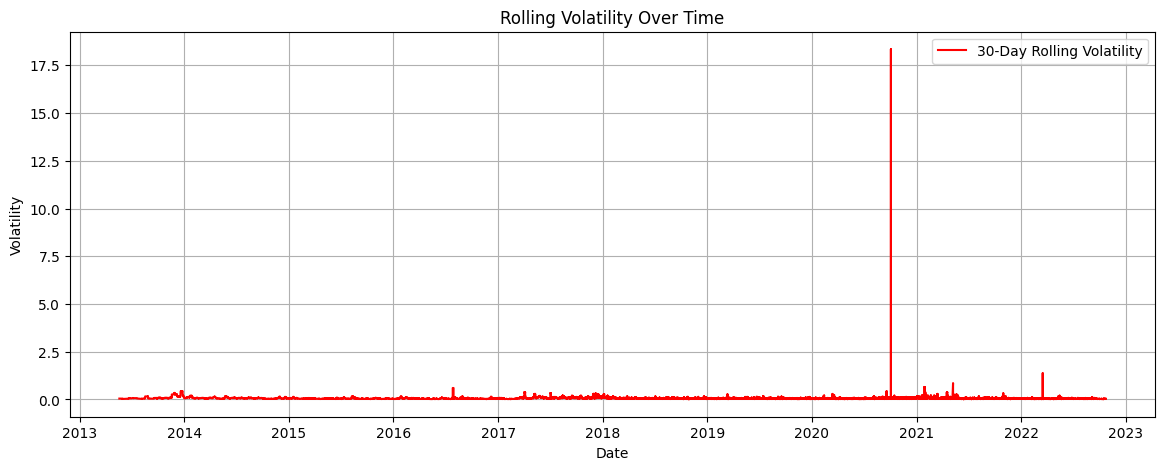

In [ ]:
# 30-Day Rolling Volatility Trend

plt.figure(figsize=(14, 5))
plt.plot(df['date'], df['rolling_volatility'], label='30-Day Rolling Volatility', color='red')
plt.title('Rolling Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.grid(True)
plt.legend()
plt.show()


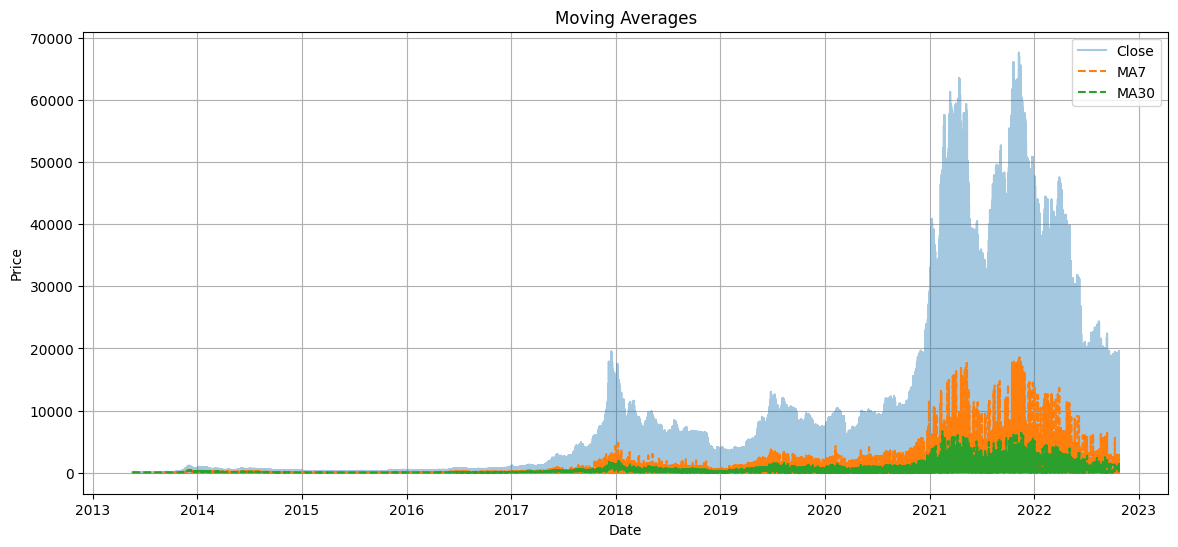

In [ ]:
# Moving Averages (MA7 and MA30)

plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['close'], label='Close', alpha=0.4)
plt.plot(df['date'], df['ma7'], label='MA7', linestyle='--')
plt.plot(df['date'], df['ma30'], label='MA30', linestyle='--')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


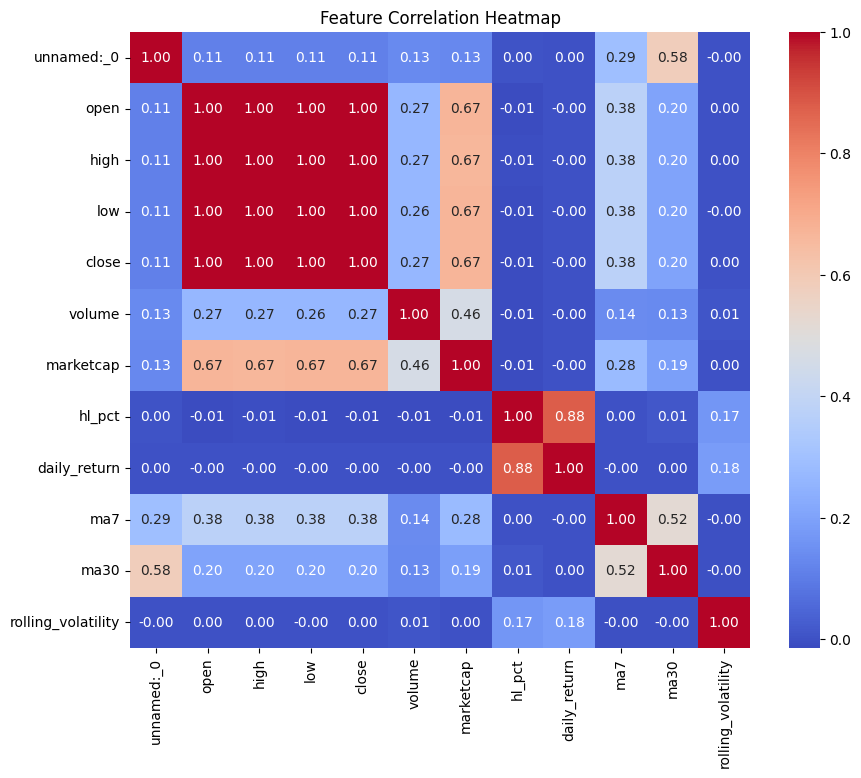

In [ ]:
# Feature Correlation Heatmap

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()




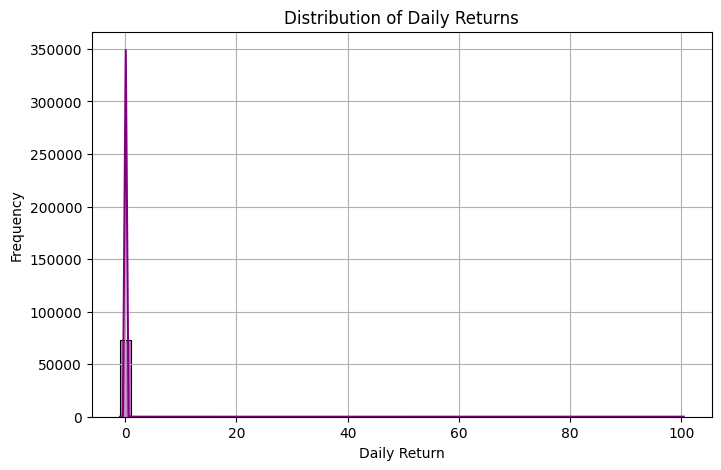

In [ ]:
# Distribution of Daily Returns

plt.figure(figsize=(8, 5))
sns.histplot(df['daily_return'].dropna(), bins=50, kde=True, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Define the Target Variable

# We’ll shift the rolling_volatility column so that today's features predict tomorrow’s volatility.

# Predict next-day volatility
df['target_volatility'] = df['rolling_volatility'].shift(-1)

# Drop the last row (since its target becomes NaN)
df.dropna(inplace=True)


In [ ]:
# Define Features and Target

# Define input features
features = ['open', 'high', 'low', 'close', 'volume',
            'hl_pct', 'daily_return', 'ma7', 'ma30',
            'rolling_volatility']

X = df[features]
y = df['target_volatility']


In [ ]:
# Train-Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [ ]:
# Train a Machine Learning Model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Initialize and train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)


In [ ]:
# Evaluate the Model

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse:.6f}')
print(f'Mean Absolute Error (MAE): {mae:.6f}')
print(f'R² Score: {r2:.4f}')


Root Mean Squared Error (RMSE): 0.095702
Mean Absolute Error (MAE): 0.004754
R² Score: -1.1683


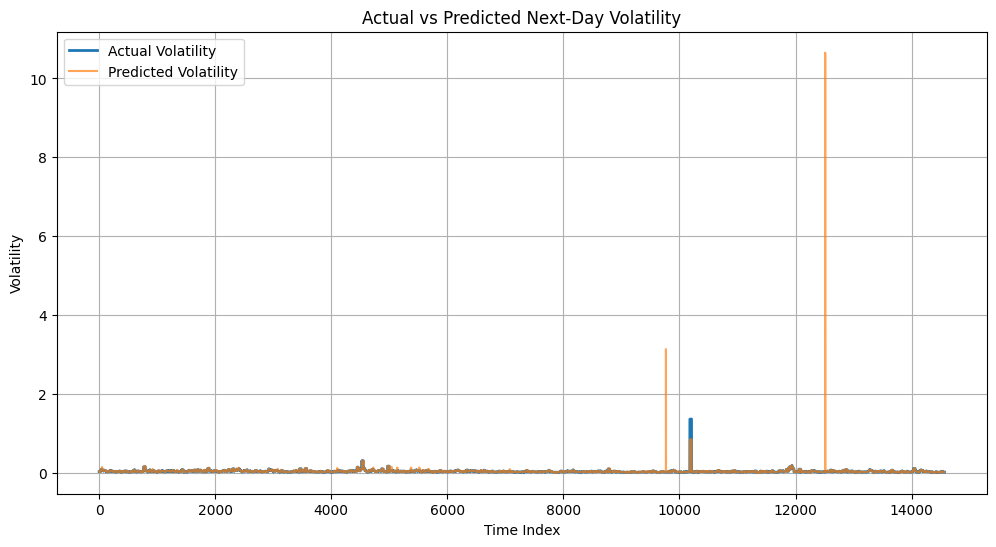

In [ ]:
# Visualize Predicted vs Actual Volatility

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Volatility', linewidth=2)
plt.plot(y_pred, label='Predicted Volatility', alpha=0.7)
plt.title('Actual vs Predicted Next-Day Volatility')
plt.xlabel('Time Index')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': [100],
    'max_depth': [10, None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, None], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [100]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [ ]:
best_rf = grid_search.best_estimator_


In [ ]:
import joblib
joblib.dump(best_rf, 'volatility_model.pkl')


['volatility_model.pkl']

In [ ]:
from google.colab import files

# Download from Colab
files.download('volatility_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install streamlit joblib numpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 90.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 106.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.6 MB/s eta 0:00:00


In [ ]:
from google.colab import files
files.download('volatility_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# ML Project: Volatility Prediction

## Exploratory Data Analysis (EDA)

         Unnamed: 0          open          high           low         close  \
count  72946.000000  72946.000000  7.294600e+04  72946.000000  7.294600e+04   
mean   36472.500000    870.194495  8.964124e+02    844.060640  8.712949e+02   
std    21057.840705   5231.654470  5.398613e+03   5079.389387  5.235508e+03   
min        0.000000      0.000000  1.022100e-10      0.000000  8.292000e-11   
25%    18236.250000      0.167916  1.767999e-01      0.158630  1.682982e-01   
50%    36472.500000      1.630666  1.717542e+00      1.541486  1.640219e+00   
75%    54708.750000     26.070557  2.756868e+01     24.791776  2.625195e+01   
max    72945.000000  67549.735581  1.621883e+05  66458.723733  6.756683e+04   

             volume     marketCap  
count  7.294600e+04  7.294600e+04  
mean   2.207607e+09  1.474922e+10  
std    9.617885e+09  7.501159e+10  
min    0.000000e+00  0.000000e+00  
25%    8.320618e+06  1.860432e+08  
50%    1.098756e+08  1.268539e+09  
75%    6.691398e+08  5.118618e+09  


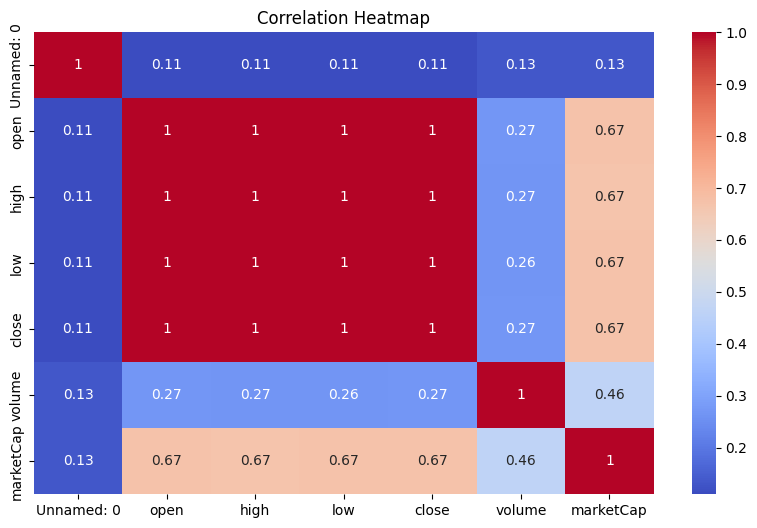

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Basic Stats
print(df.describe())

# Only use numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



## 🛠️ Feature Engineering

In [8]:
# Convert 'date' to datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [10]:
# Drop rows where conversion failed
df.dropna(subset=['date'], inplace=True)

# Extract time-based features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday


## Define Target and Features

In [11]:
target = 'volatility'
X = df.drop(columns=['volatility', 'date', 'return'])
y = df['volatility']

print("Features:", X.columns.tolist())
print("Target:", target)


Features: ['Unnamed: 0', 'open', 'high', 'low', 'close', 'volume', 'marketCap', 'timestamp', 'crypto_name', 'day', 'month', 'weekday']
Target: volatility


## Train-Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


## Train a Random Forest Regressor

In [19]:
# Ensure date is datetime (optional, in case you need it for future use)
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop problematic non-numeric columns
df = df.drop(columns=['date', 'symbol'], errors='ignore')

# Drop rows with NaNs (especially after rolling volatility or date conversion)
df = df.dropna()




In [20]:
# Define X and y
X = df.drop(columns=['volatility'], errors='ignore')
y = df['volatility']

# Confirm all X columns are numeric
print(X.dtypes)  # Should only show int or float types



Unnamed: 0       int64
open           float64
high           float64
low            float64
close          float64
volume         float64
marketCap      float64
timestamp       object
crypto_name     object
return         float64
day              int32
month            int32
weekday          int32
dtype: object


In [22]:
# Check what non-numeric columns are left in X
non_numeric_columns = X.select_dtypes(exclude=['number']).columns.tolist()
print("Non-numeric columns in X:", non_numeric_columns)

# Drop them from X
X = X.drop(columns=non_numeric_columns)

# Confirm again
print("Final X types:\n", X.dtypes)


Non-numeric columns in X: ['timestamp', 'crypto_name']
Final X types:
 Unnamed: 0      int64
open          float64
high          float64
low           float64
close         float64
volume        float64
marketCap     float64
return        float64
day             int32
month           int32
weekday         int32
dtype: object


In [23]:
# Now safe to split and train
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.629515662679767e+20


## Visualize Predictions

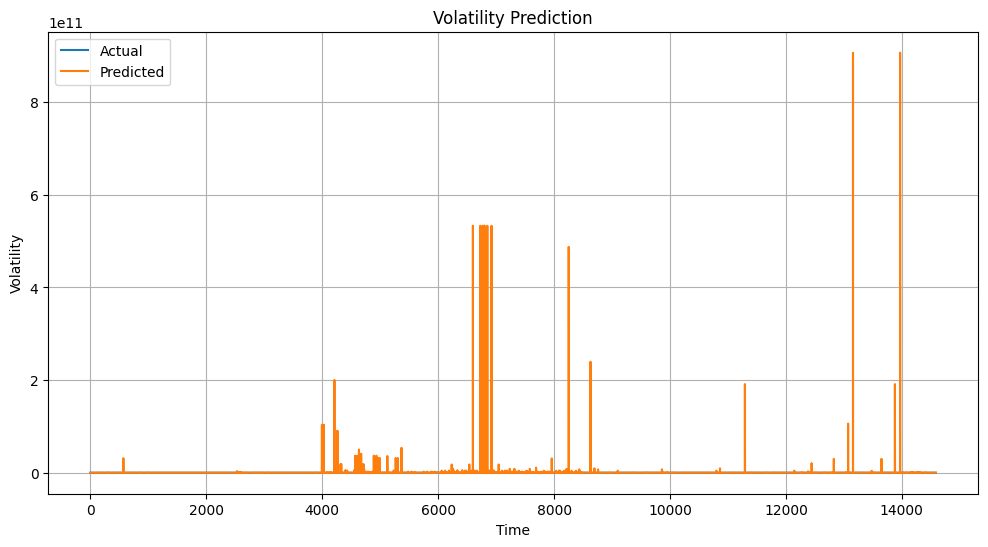

In [24]:
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title("Volatility Prediction")
plt.xlabel("Time")
plt.ylabel("Volatility")
plt.legend()
plt.grid()
plt.show()


## Save the Model

In [25]:
import joblib
joblib.dump(model, 'volatility_model.pkl')

['volatility_model.pkl']